In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wn

In [2]:
wn.filterwarnings(action='ignore')

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

In [4]:
# importing the preprocessed dataset for model making
df_input = pd.read_csv('./h1b_for_model_making_01.csv',index_col= None)

In [5]:
df_input

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,DATE,WAGE_CATERGORIZED
0,1373320,CERTIFIED,other,IT Profession,Y,58011.0,2014.0,other,2014-01-01,MEDIUM
1,1926007,CERTIFIED,infosys limited,IT Profession,Y,70948.8,2013.0,california,2013-01-01,HIGH
2,1601710,CERTIFIED,tata consultancy services limited,IT Profession,Y,41558.0,2014.0,ohio,2014-01-01,MEDIUM
3,2417561,CERTIFIED,other,IT Profession,Y,47570.0,2012.0,other,2012-01-01,MEDIUM
4,2420331,CERTIFIED,other,Architecture & Engineering,Y,55598.0,2012.0,illinois,2012-01-01,MEDIUM
...,...,...,...,...,...,...,...,...,...,...
79577,3002354,DENIED,other,Teaching,Y,33134.0,2011.0,ohio,2011-01-01,MEDIUM
79578,3002355,DENIED,other,IT Profession,Y,43368.0,2011.0,other,2011-01-01,MEDIUM
79579,3002357,DENIED,other,IT Profession,Y,46488.0,2011.0,texas,2011-01-01,MEDIUM
79580,3002365,DENIED,other,Medical,Y,38496.0,2011.0,california,2011-01-01,MEDIUM


In [6]:
df_input.columns

Index(['Unnamed: 0', 'CASE_STATUS', 'EMPLOYER_NAME', 'SOC_NAME',
       'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'YEAR', 'WORKSITE', 'DATE',
       'WAGE_CATERGORIZED'],
      dtype='object')

In [7]:
df = df_input.drop('Unnamed: 0', axis=1)

In [8]:
df.columns

Index(['CASE_STATUS', 'EMPLOYER_NAME', 'SOC_NAME', 'FULL_TIME_POSITION',
       'PREVAILING_WAGE', 'YEAR', 'WORKSITE', 'DATE', 'WAGE_CATERGORIZED'],
      dtype='object')

In [9]:
# Encoding Categorical Data

In [10]:
le_cols = ['CASE_STATUS', 'EMPLOYER_NAME', 'SOC_NAME', 'WORKSITE', 'FULL_TIME_POSITION', 'WAGE_CATERGORIZED']
# we will use label encoder for converting categorical columns to numerical columns

In [11]:
le_case_status = LabelEncoder()
le_case_status.fit(df['CASE_STATUS'])
df['CASE_STATUS_ENCODED'] = le_case_status.transform(df['CASE_STATUS'])

In [12]:
print(le_case_status.classes_)
print(df['CASE_STATUS_ENCODED'].unique())
print(df['CASE_STATUS_ENCODED'].nunique())

['CERTIFIED' 'DENIED']
[0 1]
2


In [13]:
le_emp_name = LabelEncoder()
le_emp_name.fit(df['EMPLOYER_NAME'])
df['EMPLOYER_NAME_ENCODED'] = le_emp_name.transform(df['EMPLOYER_NAME'])

In [14]:
print(le_emp_name.classes_)
print(df['EMPLOYER_NAME_ENCODED'].unique())
print(df['EMPLOYER_NAME_ENCODED'].nunique())

['accenture llp' 'capgemini america inc'
 'cognizant technology solutions us corporation' 'deloitte and touche llp'
 'deloitte consulting llp' 'ernst and young us llp' 'fujitsu america inc'
 'hcl america inc' 'ibm corporation' 'ibm india private limited'
 'igate technologies inc' 'infosys limited' 'intel corporation'
 'larsen and toubro infotech limited' 'microsoft corporation' 'other'
 'tata consultancy services limited' 'tech mahindra americas inc'
 'tech mahindra americasinc' 'ust global inc' 'wipro limited']
[15 11 16  9  1  4  6 20  3  2 17 12 13 10  0  5 19  8 18 14  7]
21


In [15]:
le_soc_name = LabelEncoder()
le_soc_name.fit(df['SOC_NAME'])
df['SOC_NAME_ENCODED'] = le_soc_name.transform(df['SOC_NAME'])

In [16]:
print(le_soc_name.classes_)
print(df['SOC_NAME_ENCODED'].unique())
print(df['SOC_NAME_ENCODED'].nunique())

['Advance Science' 'Architecture & Engineering' 'Fashion & Entertainment'
 'Finance' 'Food & Service' 'IT Profession' 'Lawyer' 'Management'
 'Marketing' 'Mathematician' 'Medical' 'Others' 'Teaching' 'Technician'
 'actuaries' 'geographers' 'internists general' 'librarians'
 'operation research analysts' 'other' 'psychologists ']
[ 5  1 12  7 10  8  3  9 18  0  2  4 16 13 11 19 14 20  6 17 15]
21


In [17]:
le_worksite = LabelEncoder()
le_worksite.fit(df['WORKSITE'])
df['WORKSITE_ENCODED'] = le_worksite.transform(df['WORKSITE'])

In [18]:
print(le_worksite.classes_)
print(df['WORKSITE_ENCODED'].unique())
print(df['WORKSITE_ENCODED'].nunique())

['arizona' 'california' 'connecticut' 'florida' 'georgia' 'illinois'
 'maryland' 'massachusetts' 'michigan' 'minnesota' 'missouri' 'newjersey'
 'newyork' 'northcarolina' 'ohio' 'other' 'pennsylvania' 'texas'
 'virginia' 'washington' 'wisconsin']
[15  1 14  5 12 17  8 16  7  4  0  2  3 11 13 18 10 20  9 19  6]
21


In [19]:
le_fulltime = LabelEncoder()
le_fulltime.fit(df['FULL_TIME_POSITION'])
df['FULL_TIME_POSITION_ENCODED'] = le_fulltime.transform(df['FULL_TIME_POSITION'])

In [20]:
print(le_fulltime.classes_)
print(df['FULL_TIME_POSITION_ENCODED'].unique())
print(df['FULL_TIME_POSITION_ENCODED'].nunique())

['N' 'Y']
[1 0]
2


In [21]:
oe_wagecat = OrdinalEncoder(categories=[['LOW','MEDIUM','HIGH']], dtype=np.int64)
oe_wagecat.fit(df[['WAGE_CATERGORIZED']])
df['WAGE_ENCODED'] = oe_wagecat.transform(df[['WAGE_CATERGORIZED']])

In [22]:
print(oe_wagecat.categories)
print(df['WAGE_ENCODED'].unique())
print(df['WAGE_ENCODED'].nunique())

[['LOW', 'MEDIUM', 'HIGH']]
[1 2 0]
3


In [23]:
df.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,DATE,WAGE_CATERGORIZED,CASE_STATUS_ENCODED,EMPLOYER_NAME_ENCODED,SOC_NAME_ENCODED,WORKSITE_ENCODED,FULL_TIME_POSITION_ENCODED,WAGE_ENCODED
0,CERTIFIED,other,IT Profession,Y,58011.0,2014.0,other,2014-01-01,MEDIUM,0,15,5,15,1,1
1,CERTIFIED,infosys limited,IT Profession,Y,70948.8,2013.0,california,2013-01-01,HIGH,0,11,5,1,1,2
2,CERTIFIED,tata consultancy services limited,IT Profession,Y,41558.0,2014.0,ohio,2014-01-01,MEDIUM,0,16,5,14,1,1
3,CERTIFIED,other,IT Profession,Y,47570.0,2012.0,other,2012-01-01,MEDIUM,0,15,5,15,1,1
4,CERTIFIED,other,Architecture & Engineering,Y,55598.0,2012.0,illinois,2012-01-01,MEDIUM,0,15,1,5,1,1


In [24]:
df['CASE_STATUS'].value_counts()

CERTIFIED    55761
DENIED       23821
Name: CASE_STATUS, dtype: int64

,Feature,Chi_Square,P_val
0,FULL_TIME_POSITION_ENCODED,51.220268,0.00000
1,EMPLOYER_NAME_ENCODED,213.522631,0.00000
2,SOC_NAME_ENCODED,663.793458,0.00000
4,WAGE_ENCODED,46.044732,0.00000
3,WORKSITE_ENCODED,0.006353,0.93647


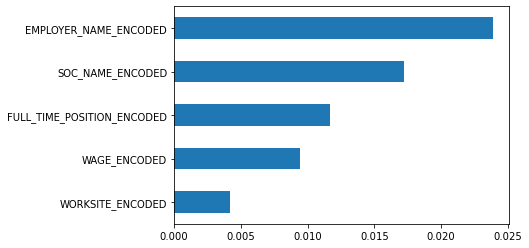

In [25]:
# using chi square test to check which categorical column is important with categorical output variable
# df.info()
from sklearn.feature_selection import mutual_info_classif
xchi = df[['FULL_TIME_POSITION_ENCODED','EMPLOYER_NAME_ENCODED','SOC_NAME_ENCODED','WORKSITE_ENCODED', 'WAGE_ENCODED']]
ychi = df['CASE_STATUS_ENCODED']
array = mutual_info_classif(xchi,ychi)
s1 = pd.Series(array)
s1.index = xchi.columns
s1.sort_values(ascending=True).plot(kind = 'barh')

# chi2
from sklearn.feature_selection import SelectKBest,chi2

best_features = SelectKBest(score_func=chi2,k = 'all')
best_features.fit(xchi,ychi)

df_chi2 = pd.DataFrame({'Feature':xchi.columns,"Chi_Square":best_features.scores_})
df_chi2.sort_values('Chi_Square',ascending=False)

chi2_score, p_val = chi2(xchi,ychi)
df_chi2 = pd.DataFrame({'Feature':xchi.columns,"Chi_Square":chi2_score,'P_val':np.around(p_val,5)})
df_chi2.sort_values('P_val')

In [26]:
# Since, from the Chi Square Test it is visible that the P Value for the worksite column is 0.93, hence we can 
# from this column if needed, we will check and confirm and then drop

In [27]:
df.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,DATE,WAGE_CATERGORIZED,CASE_STATUS_ENCODED,EMPLOYER_NAME_ENCODED,SOC_NAME_ENCODED,WORKSITE_ENCODED,FULL_TIME_POSITION_ENCODED,WAGE_ENCODED
0,CERTIFIED,other,IT Profession,Y,58011.0,2014.0,other,2014-01-01,MEDIUM,0,15,5,15,1,1
1,CERTIFIED,infosys limited,IT Profession,Y,70948.8,2013.0,california,2013-01-01,HIGH,0,11,5,1,1,2
2,CERTIFIED,tata consultancy services limited,IT Profession,Y,41558.0,2014.0,ohio,2014-01-01,MEDIUM,0,16,5,14,1,1
3,CERTIFIED,other,IT Profession,Y,47570.0,2012.0,other,2012-01-01,MEDIUM,0,15,5,15,1,1
4,CERTIFIED,other,Architecture & Engineering,Y,55598.0,2012.0,illinois,2012-01-01,MEDIUM,0,15,1,5,1,1


In [28]:
df['CASE_STATUS_ENCODED'].value_counts()

0    55761
1    23821
Name: CASE_STATUS_ENCODED, dtype: int64

In [29]:
# using standard scaler for converting the values into standard normal range for faster convergence of model
from sklearn.preprocessing import StandardScaler
s_sc = StandardScaler()

In [30]:
df[['PREVAILING_WAGE']].ndim

2

In [31]:
s_sc.fit(df[['PREVAILING_WAGE']])
df['PREVAILING_WAGE_SCALED'] = s_sc.transform(df[['PREVAILING_WAGE',]])

In [32]:
df.columns

Index(['CASE_STATUS', 'EMPLOYER_NAME', 'SOC_NAME', 'FULL_TIME_POSITION',
       'PREVAILING_WAGE', 'YEAR', 'WORKSITE', 'DATE', 'WAGE_CATERGORIZED',
       'CASE_STATUS_ENCODED', 'EMPLOYER_NAME_ENCODED', 'SOC_NAME_ENCODED',
       'WORKSITE_ENCODED', 'FULL_TIME_POSITION_ENCODED', 'WAGE_ENCODED',
       'PREVAILING_WAGE_SCALED'],
      dtype='object')

In [33]:
final_cols = ['PREVAILING_WAGE_SCALED', 'CASE_STATUS_ENCODED', 'FULL_TIME_POSITION_ENCODED',
       'EMPLOYER_NAME_ENCODED', 'SOC_NAME_ENCODED', 'WORKSITE_ENCODED', 'WAGE_ENCODED']

In [34]:
final_cols

['PREVAILING_WAGE_SCALED',
 'CASE_STATUS_ENCODED',
 'FULL_TIME_POSITION_ENCODED',
 'EMPLOYER_NAME_ENCODED',
 'SOC_NAME_ENCODED',
 'WORKSITE_ENCODED',
 'WAGE_ENCODED']

In [35]:
df[final_cols]

,PREVAILING_WAGE_SCALED,CASE_STATUS_ENCODED,FULL_TIME_POSITION_ENCODED,EMPLOYER_NAME_ENCODED,SOC_NAME_ENCODED,WORKSITE_ENCODED,WAGE_ENCODED
0,-0.372412,0,1,15,5,15,1
1,0.513339,0,1,11,5,1,2
2,-1.498822,0,1,16,5,14,1
3,-1.087227,0,1,15,5,15,1
4,-0.537611,0,1,15,1,5,1
...,...,...,...,...,...,...,...
79577,-2.075548,1,1,15,12,14,1
79578,-1.374905,1,1,15,5,15,1
79579,-1.161303,1,1,15,5,17,1
79580,-1.708453,1,1,15,10,1,1


In [36]:
df['CASE_STATUS_ENCODED'].value_counts()

0    55761
1    23821
Name: CASE_STATUS_ENCODED, dtype: int64

In [37]:
# we will do upsampling in our dataset as our dataset is imbalanced
from imblearn import over_sampling,under_sampling
from imblearn.over_sampling import SMOTE
from collections import Counter

X = df[['PREVAILING_WAGE_SCALED',
        'FULL_TIME_POSITION_ENCODED',
        'EMPLOYER_NAME_ENCODED',
        'SOC_NAME_ENCODED',
        'WORKSITE_ENCODED',
        'WAGE_ENCODED']]

y = df['CASE_STATUS_ENCODED']

# Print the original class distribution
print("Original class distribution:", Counter(y))

# Instantiate the SMOTE algorithm
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to generate synthetic samples
X_resampled, y_resampled = smote.fit_resample(X, y)

# Print the resampled class distribution
print("Resampled class distribution:", Counter(y_resampled))

Original class distribution: Counter({0: 55761, 1: 23821})
Resampled class distribution: Counter({0: 55761, 1: 55761})


In [38]:
# we will use this resampled data from model making
# also we will see results with worksite dropped and present in the accuracy and then decide wether to use it or not

In [39]:
X_resampled

,PREVAILING_WAGE_SCALED,FULL_TIME_POSITION_ENCODED,EMPLOYER_NAME_ENCODED,SOC_NAME_ENCODED,WORKSITE_ENCODED,WAGE_ENCODED
0,-0.372412,1,15,5,15,1
1,0.513339,1,11,5,1,2
2,-1.498822,1,16,5,14,1
3,-1.087227,1,15,5,15,1
4,-0.537611,1,15,1,5,1
...,...,...,...,...,...,...
111517,-1.114338,1,15,5,5,1
111518,-2.350854,1,15,10,16,0
111519,1.000843,1,15,5,12,2
111520,-0.324009,1,15,5,2,1


In [40]:
y_resampled

0         0
1         0
2         0
3         0
4         0
         ..
111517    1
111518    1
111519    1
111520    1
111521    1
Name: CASE_STATUS_ENCODED, Length: 111522, dtype: int32

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.3, random_state = 123456789)

In [42]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((78065, 6), (33457, 6), (78065,), (33457,))

In [43]:
# For plotting roc graph & area under curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
def roc_curve_graph(X_test,y_test,model):
    preds = model.predict_proba(X_test) [:,1]
    #Compute Receiver operating characteristic (ROC) curve
    fpr, tpr, threshold = roc_curve(y_test, preds)
    #ROC Score
    roc_auc = auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [44]:
# Defining Evaluation metrics 
def evaluate_model(model):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

    y_true = y_test
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred)
    # print("Confusion Matrix :\n")
    # print(confusion_matrix(y_test,y_pred))
    print(f"accuracy : {accuracy:0.2f}")
    print(f"precision : {precision:0.2f}")
    print(f"recall : {recall:0.2f}")
    print(f"f1 score : {f1:0.2f}")
    print(f"auc score : {auc:0.2f}")

In [45]:
# Model 1, Logistic Regression Model

In [46]:
model_logistic_regression = LogisticRegressionCV()

In [47]:
model_logistic_regression.fit(X_train, y_train)

LogisticRegressionCV()

In [48]:
model_logistic_regression.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

In [49]:
model_logistic_regression.score(X_test, y_test)

0.5371372209104224

In [50]:
evaluate_model(model_logistic_regression)

accuracy : 0.54
precision : 0.54
recall : 0.52
f1 score : 0.53
auc score : 0.54


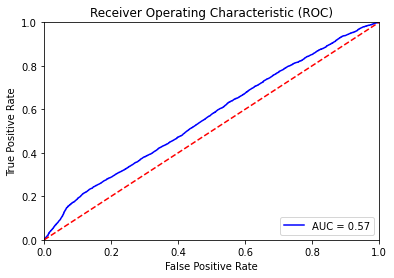

In [51]:
roc_curve_graph(X_test,y_test,model_logistic_regression)

In [52]:
# lets make model without the input column worksite and check the accuracy
X_without_worksite= X_resampled.drop(['WORKSITE_ENCODED'], axis = 1)

In [53]:
X_without_worksite

,PREVAILING_WAGE_SCALED,FULL_TIME_POSITION_ENCODED,EMPLOYER_NAME_ENCODED,SOC_NAME_ENCODED,WAGE_ENCODED
0,-0.372412,1,15,5,1
1,0.513339,1,11,5,2
2,-1.498822,1,16,5,1
3,-1.087227,1,15,5,1
4,-0.537611,1,15,1,1
...,...,...,...,...,...
111517,-1.114338,1,15,5,1
111518,-2.350854,1,15,10,0
111519,1.000843,1,15,5,2
111520,-0.324009,1,15,5,1


In [54]:
X_train_we, X_test_we, y_train_we, y_test_we = train_test_split(X_without_worksite,y_resampled, test_size=0.3)

In [55]:
print(X_train_we.shape,X_test_we.shape,y_train_we.shape,y_test_we.shape)

(78065, 5) (33457, 5) (78065,) (33457,)


In [56]:
model_logistic_regression_without_worksite = LogisticRegressionCV(cv=5)

In [57]:
model_logistic_regression_without_worksite.fit(X_train_we, y_train_we)

LogisticRegressionCV(cv=5)

In [58]:
model_logistic_regression_without_worksite.score(X_test_we,y_test_we)

0.5316077353020294

In [59]:
# since there is little change in accuracy we will consider the worksite column in our model

In [60]:
LogisticRegressionCV()

LogisticRegressionCV()

In [61]:
# hyper parameter tuning of logistic regression model
logistic_regression_grid = {
    'cv' : [3,4,5],
    'penalty' : ['l1', 'l2', 'elasticnet']
}

In [68]:
grid_search_logistic_regression = GridSearchCV(estimator=model_logistic_regression,
                          param_grid = logistic_regression_grid,
                          n_jobs=-1,
                          verbose=4,
                          scoring='f1')

In [63]:
grid_search_logistic_regression.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(estimator=LogisticRegressionCV(), n_jobs=-1,
             param_grid={'cv': [3, 4, 5],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='f1', verbose=4)

In [64]:
grid_search_logistic_regression.best_params_

{'cv': 3, 'penalty': 'l2'}

In [65]:
logistic_regression_best = grid_search_logistic_regression.best_estimator_

In [66]:
evaluate_model(logistic_regression_best)

accuracy : 0.54
precision : 0.54
recall : 0.52
f1 score : 0.53
auc score : 0.54


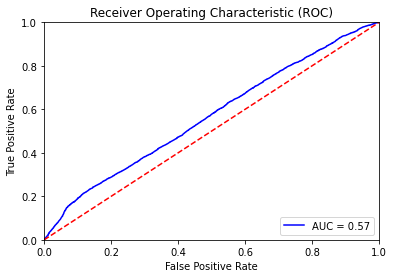

In [67]:
roc_curve_graph(X_test, y_test, logistic_regression_best)

In [69]:
# Model 2, Decision Tree Classifier
model_decission_tree = DecisionTreeClassifier()
model_decission_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [70]:
evaluate_model(model_decission_tree)

accuracy : 0.69
precision : 0.71
recall : 0.64
f1 score : 0.67
auc score : 0.69


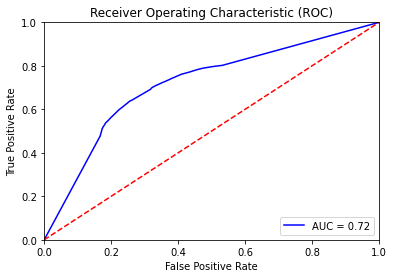

In [71]:
roc_curve_graph(X_test,y_test,model_decission_tree)

In [72]:
decission_tree_grid = {
    'criterion' : ['gini','entropy'],
    'splitter' : ['best','random'],
    'max_depth' : [4,6,8,10],
    'min_samples_split' : [2,4,6,8],
    'min_samples_leaf' : [2,3,4,5]
}

In [73]:
grid_search_decission_tree = GridSearchCV(estimator=model_decission_tree,
                          param_grid=decission_tree_grid,
                          cv = 4,
                          n_jobs=-1,
                          verbose=4,
                          scoring='f1')

In [74]:
grid_search_decission_tree.fit(X_train,y_train)

Fitting 4 folds for each of 256 candidates, totalling 1024 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [2, 4, 6, 8],
                         'splitter': ['best', 'random']},
             scoring='f1', verbose=4)

In [75]:
grid_search_decission_tree.best_estimator_

DecisionTreeClassifier(max_depth=8, min_samples_leaf=2, min_samples_split=4,
                       splitter='random')

In [76]:
decission_tree_best = grid_search_decission_tree.best_estimator_

In [77]:
evaluate_model(decission_tree_best)

accuracy : 0.59
precision : 0.63
recall : 0.44
f1 score : 0.52
auc score : 0.59


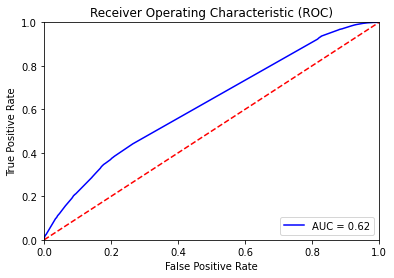

In [80]:
roc_curve_graph(X_test, y_test, decission_tree_best)

In [81]:
# Model 3, Random Forest Classifier
model_random_forest = RandomForestClassifier()
model_random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [82]:
evaluate_model(model_random_forest)

accuracy : 0.70
precision : 0.71
recall : 0.68
f1 score : 0.70
auc score : 0.70


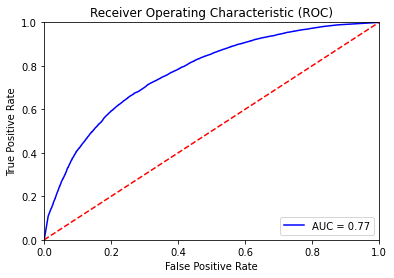

In [83]:
roc_curve_graph(X_test, y_test, model_random_forest)

In [84]:
random_forest_grid = {
    'criterion' : ['gini'],
    'max_depth' : [4,6,8],
    'min_samples_split' : [2,4,6,8],
    'min_samples_leaf' : [2,3,4],
    'n_estimators' : [50,75,100]
}

In [85]:
grid_search_random_forest = GridSearchCV(estimator=model_random_forest,
                          param_grid=random_forest_grid,
                          cv = 4,
                          n_jobs=-1,
                          verbose=3,
                          scoring='f1')

In [86]:
grid_search_random_forest.fit(X_train,y_train)

Fitting 4 folds for each of 108 candidates, totalling 432 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [4, 6, 8],
                         'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [50, 75, 100]},
             scoring='f1', verbose=3)

In [87]:
random_forest_best = grid_search_random_forest.best_estimator_
evaluate_model(random_forest_best)

accuracy : 0.61
precision : 0.58
recall : 0.80
f1 score : 0.67
auc score : 0.61


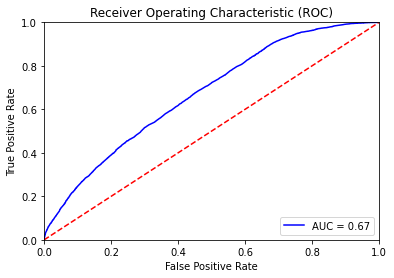

In [88]:
roc_curve_graph(X_test, y_test, random_forest_best)

In [89]:
# Model 4, Gradient Boosting Classifier
model_gradboost = GradientBoostingClassifier()
model_gradboost.fit(X_train, y_train)

GradientBoostingClassifier()

In [90]:
evaluate_model(model_gradboost)

accuracy : 0.61
precision : 0.58
recall : 0.85
f1 score : 0.69
auc score : 0.61


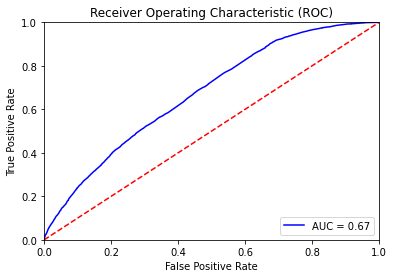

In [91]:
roc_curve_graph(X_test,y_test, model_gradboost)

In [92]:
# Model 5, ada Boosting Classifier
model_adaboost = AdaBoostClassifier()
model_adaboost.fit(X_train, y_train)

AdaBoostClassifier()

In [93]:
evaluate_model(model_adaboost)

accuracy : 0.61
precision : 0.58
recall : 0.76
f1 score : 0.66
auc score : 0.61


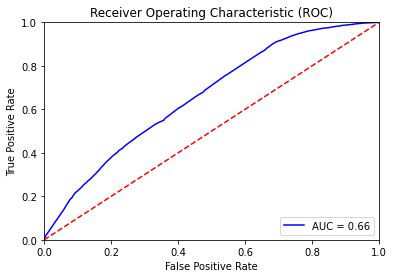

In [94]:
roc_curve_graph(X_test,y_test, model_adaboost)

In [95]:
# Model 6, XG Boost Classifier
from xgboost import XGBClassifier
model_xgboost = XGBClassifier()
model_xgboost.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [96]:
evaluate_model(model_xgboost)

accuracy : 0.65
precision : 0.63
recall : 0.74
f1 score : 0.68
auc score : 0.65


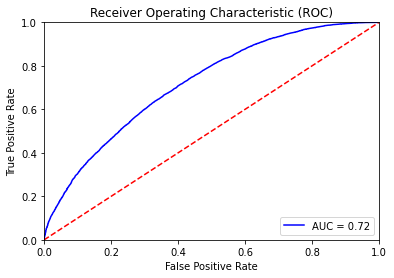

In [97]:
roc_curve_graph(X_test, y_test, model_xgboost)

In [98]:
models = [logistic_regression_best, decission_tree_best, model_random_forest, model_gradboost, model_adaboost, model_xgboost]

In [99]:
for model in models:
    print(f'{model}')
    evaluate_model(model)
    print()

LogisticRegressionCV(cv=3)
accuracy : 0.54
precision : 0.54
recall : 0.52
f1 score : 0.53
auc score : 0.54

DecisionTreeClassifier(max_depth=8, min_samples_leaf=2, min_samples_split=4,
                       splitter='random')
accuracy : 0.59
precision : 0.63
recall : 0.44
f1 score : 0.52
auc score : 0.59

RandomForestClassifier()
accuracy : 0.70
precision : 0.71
recall : 0.68
f1 score : 0.70
auc score : 0.70

GradientBoostingClassifier()
accuracy : 0.61
precision : 0.58
recall : 0.85
f1 score : 0.69
auc score : 0.61

AdaBoostClassifier()
accuracy : 0.61
precision : 0.58
recall : 0.76
f1 score : 0.66
auc score : 0.61

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_cons

In [100]:
import pickle
pickle.dump(logistic_regression_best, open('logistic_regression_best.pkl', 'wb'))
pickle.dump(decission_tree_best, open('decission_tree_best.pkl', 'wb'))
pickle.dump(model_random_forest, open('model_random_forest.pkl', 'wb'))
pickle.dump(model_gradboost, open('model_gradboost.pkl', 'wb'))
pickle.dump(model_adaboost, open('model_adaboost.pkl', 'wb'))
pickle.dump(model_xgboost, open('model_xgboost.pkl', 'wb'))

In [101]:
# Trying model with deep learning artificial neural network

In [102]:
print(X_train.shape)
print(X_train.iloc[2].shape) # this will be the input shape to our ann model

(78065, 6)
(6,)


In [103]:
import math
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.utils import to_categorical #for converting our y data ie from alphabets a-z to catergorical form
from tensorflow.keras.models import Sequential 
#for creating sequential model of different dense layers,all layers together make sequential model
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten 
#for creating layers of training, dense means connected to each other, Conv2d,maxpool2d,flattern for cnn transfer ler model
#for creating layers of training, dense means connected to each other, Conv2d,maxpool2d,flattern for cnn transfer lerning model
from tensorflow.keras.losses import binary_crossentropy

In [104]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.densenet import DenseNet201

In [105]:
#ann model
model = Sequential()
model.add(Dense(64, activation = 'relu', input_shape=(6,))) #trainable parameters = 6x64 + 64 bias
model.add(Dense(64, activation = 'relu')) #trainable parameters = 64x64 + 64 bias
model.add(Dense(1, activation = 'softmax')) #trainable parameters = 64x1 + 1 bias

model.compile(loss='binary_crossentropy', metrics=['accuracy']) 
#the parameters whcih are common to whole model need to be given in compile line code
#common parametrs are loss function, optimizer, metrics used for our model
#each layer can have diff numbers of neuron and diff activation function & diff kernel initializers

In [106]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                448       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,673
Trainable params: 4,673
Non-trainable params: 0
_________________________________________________________________


In [107]:
import time

In [108]:
from tensorflow.keras.callbacks import EarlyStopping

In [109]:
es = EarlyStopping(monitor='loss', verbose=1,patience=3)
#Stops training when a monitored metric has stopped improving, checking 3 recent loss and accuracy improvement

In [110]:
init = time.time()
ann_model = model.fit(X_train,y_train, epochs = 100, batch_size=32,verbose=0,callbacks=es) #mini batch gd, value should be in power of 2
end = time.time()
print('Training Time is:',int(end-init))
#returns the epoch where training has stopped

Epoch 17: early stopping
Training Time is: 52


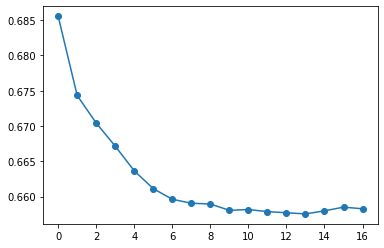

In [111]:
plt.plot(ann_model.history['loss'],marker='o') 
#this plots the loss function graph for mini batch gd
#as we can observe that the loss after a certain pt is increasing so we need to stop training our model at that point
#this can be achived by the callback parameter and earlystopping

In [112]:
ann_pred = model.predict(X_test)

1046/1046 [==============================] - 1s 1ms/step


In [113]:
ann_pred

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [114]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print(accuracy_score(y_test, ann_pred))
print(precision_score(y_test,ann_pred))
print(recall_score(y_test, ann_pred))
print(f1_score(y_test, ann_pred))

0.5010610634545835
0.5010610634545835
1.0
0.6676091674797395


In [115]:
# Hyper parameter tuning the ann model

In [116]:
import kerastuner as kt

In [117]:
def build_model(hp):
  model = tf.keras.Sequential()
  
  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512
  hp_units1 = hp.Int('units1', min_value=32, max_value=512, step=32)
  hp_units2 = hp.Int('units2', min_value=32, max_value=512, step=32)
  hp_units3 = hp.Int('units3', min_value=32, max_value=512, step=32)
  model.add(Dense(units=hp_units1, activation='relu'))
  model.add(tf.keras.layers.Dense(units=hp_units2, activation='relu'))
  model.add(tf.keras.layers.Dense(units=hp_units3, activation='relu'))
  model.add(Dense(1, kernel_initializer='normal', activation='linear'))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  model.compile(
      optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
      loss=binary_crossentropy,
      metrics=['accuracy']
  )

  return model

In [118]:
# HyperBand algorithm from keras tuner
tuner = kt.Hyperband(build_model,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='my_dir',
                     project_name='h1b')

In [119]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [120]:
tuner.search(X_train, y_train, epochs=10, validation_split=0.2, callbacks=[stop_early])

Trial 30 Complete [00h 00m 34s]
val_accuracy: 0.5048357248306274

Best val_accuracy So Far: 0.5991801619529724
Total elapsed time: 00h 10m 08s
INFO:tensorflow:Oracle triggered exit


In [121]:
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

In [122]:
model = tuner.hypermodel.build(best_hps)

In [125]:
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/50
1952/1952 [==============================] - 4s 2ms/step - loss: 0.6571 - accuracy: 0.5943 - val_loss: 0.6511 - val_accuracy: 0.5964
Epoch 2/50
1952/1952 [==============================] - 5s 2ms/step - loss: 0.6583 - accuracy: 0.5943 - val_loss: 0.6630 - val_accuracy: 0.5893
Epoch 3/50
1952/1952 [==============================] - 5s 2ms/step - loss: 0.6578 - accuracy: 0.5939 - val_loss: 0.6517 - val_accuracy: 0.5983
Epoch 4/50
1952/1952 [==============================] - 4s 2ms/step - loss: 0.6544 - accuracy: 0.5942 - val_loss: 0.6600 - val_accuracy: 0.5953
Epoch 5/50
1952/1952 [==============================] - 5s 2ms/step - loss: 0.6574 - accuracy: 0.5919 - val_loss: 0.6586 - val_accuracy: 0.5878
Epoch 6/50
1952/1952 [==============================] - 5s 2ms/step - loss: 0.6527 - accuracy: 0.5976 - val_loss: 0.6546 - val_accuracy: 0.5996
Epoch 7/50
1952/1952 [==============================] - 5s 2ms/step - loss: 0.6584 - accuracy: 0.5905 - val_loss: 0.6673 - val_accuracy:

In [126]:
hypermodel = tuner.hypermodel.build(best_hps)

# Retrain the model
hypermodel.fit(X_train, y_train, epochs=best_epoch, validation_split=0.2)

Epoch 1/27
1952/1952 [==============================] - 6s 3ms/step - loss: 0.6874 - accuracy: 0.5511 - val_loss: 0.6750 - val_accuracy: 0.5672
Epoch 2/27
1952/1952 [==============================] - 6s 3ms/step - loss: 0.6768 - accuracy: 0.5674 - val_loss: 0.6810 - val_accuracy: 0.5654
Epoch 3/27
1952/1952 [==============================] - 5s 2ms/step - loss: 0.6740 - accuracy: 0.5734 - val_loss: 0.6689 - val_accuracy: 0.5809
Epoch 4/27
1952/1952 [==============================] - 5s 2ms/step - loss: 0.6727 - accuracy: 0.5788 - val_loss: 0.6681 - val_accuracy: 0.5842
Epoch 5/27
1952/1952 [==============================] - 5s 2ms/step - loss: 0.6670 - accuracy: 0.5858 - val_loss: 0.6626 - val_accuracy: 0.5926
Epoch 6/27
1952/1952 [==============================] - 5s 2ms/step - loss: 0.6670 - accuracy: 0.5891 - val_loss: 0.6598 - val_accuracy: 0.5915
Epoch 7/27
1952/1952 [==============================] - 5s 2ms/step - loss: 0.6606 - accuracy: 0.5909 - val_loss: 0.6573 - val_accuracy:

In [127]:
hypermodel_pred = hypermodel.predict(X_test)

1046/1046 [==============================] - 1s 1ms/step


In [128]:
eval_result = hypermodel.evaluate(X_test, y_test)
print("[test loss, test accuracy]:", eval_result)

1046/1046 [==============================] - 1s 1ms/step - loss: 0.6505 - accuracy: 0.5998
[test loss, test accuracy]: [0.6505082249641418, 0.5998445749282837]


In [129]:
# hence comparing all the accuracies we come to know that the best model is random forest we will use that as final model

In [130]:
# import pickle
# pickle.dump(model_random_forest, open('model_random_forest.pkl', 'wb'))

In [131]:
X

,PREVAILING_WAGE_SCALED,FULL_TIME_POSITION_ENCODED,EMPLOYER_NAME_ENCODED,SOC_NAME_ENCODED,WORKSITE_ENCODED,WAGE_ENCODED
0,-0.372412,1,15,5,15,1
1,0.513339,1,11,5,1,2
2,-1.498822,1,16,5,14,1
3,-1.087227,1,15,5,15,1
4,-0.537611,1,15,1,5,1
...,...,...,...,...,...,...
79577,-2.075548,1,15,12,14,1
79578,-1.374905,1,15,5,15,1
79579,-1.161303,1,15,5,17,1
79580,-1.708453,1,15,10,1,1


In [132]:
# le_case_status
# le_emp_name
# le_fulltime
# le_soc_name
# le_worksite
# oe_wagecat
# le_case_status

In [133]:
pickle.dump(le_emp_name, open('le_emp_name.pkl', 'wb'))
pickle.dump(le_soc_name, open('le_soc_name.pkl', 'wb'))
pickle.dump(le_worksite, open('le_worksite.pkl', 'wb'))
pickle.dump(le_fulltime, open('le_fulltime.pkl', 'wb'))
pickle.dump(oe_wagecat, open('oe_wagecat.pkl', 'wb'))
pickle.dump(s_sc, open('s_sc.pkl', 'wb'))

In [134]:
df_input.columns

Index(['Unnamed: 0', 'CASE_STATUS', 'EMPLOYER_NAME', 'SOC_NAME',
       'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'YEAR', 'WORKSITE', 'DATE',
       'WAGE_CATERGORIZED'],
      dtype='object')

In [135]:
df['EMPLOYER_NAME'].unique()

array(['other', 'infosys limited', 'tata consultancy services limited',
       'ibm india private limited', 'capgemini america inc',
       'deloitte consulting llp', 'fujitsu america inc', 'wipro limited',
       'deloitte and touche llp',
       'cognizant technology solutions us corporation',
       'tech mahindra americas inc', 'intel corporation',
       'larsen and toubro infotech limited', 'igate technologies inc',
       'accenture llp', 'ernst and young us llp', 'ust global inc',
       'ibm corporation', 'tech mahindra americasinc',
       'microsoft corporation', 'hcl america inc'], dtype=object)

In [136]:
df_input['SOC_NAME'].unique()

array(['IT Profession', 'Architecture & Engineering', 'Teaching',
       'Management', 'Medical', 'Marketing', 'Finance', 'Mathematician',
       'operation research analysts', 'Advance Science',
       'Fashion & Entertainment', 'Food & Service', 'internists general',
       'Technician', 'Others', 'other', 'actuaries', 'psychologists ',
       'Lawyer', 'librarians', 'geographers'], dtype=object)

In [137]:
df_input['WORKSITE'].unique()

array(['other', 'california', 'ohio', 'illinois', 'newyork', 'texas',
       'michigan', 'pennsylvania', 'massachusetts', 'georgia', 'arizona',
       'connecticut', 'florida', 'newjersey', 'northcarolina', 'virginia',
       'missouri', 'wisconsin', 'minnesota', 'washington', 'maryland'],
      dtype=object)

In [138]:
X_test

,PREVAILING_WAGE_SCALED,FULL_TIME_POSITION_ENCODED,EMPLOYER_NAME_ENCODED,SOC_NAME_ENCODED,WORKSITE_ENCODED,WAGE_ENCODED
44071,-0.862260,0,15,5,5,1
18034,-0.637265,1,15,5,3,1
43454,1.021685,1,15,5,1,2
91512,-1.200831,1,15,5,13,1
52074,0.114629,1,15,5,11,2
...,...,...,...,...,...,...
18610,-0.793934,1,16,5,15,1
88705,-0.471299,0,15,10,1,1
47462,-0.614481,1,15,5,19,1
99715,0.981700,1,15,5,7,2


In [139]:
df_input['PREVAILING_WAGE']

0        58011.0
1        70948.8
2        41558.0
3        47570.0
4        55598.0
          ...   
79577    33134.0
79578    43368.0
79579    46488.0
79580    38496.0
79581    50357.0
Name: PREVAILING_WAGE, Length: 79582, dtype: float64

In [140]:
# Trying the prediction from constructed input
pred = (40000, 'Y', 'tata consultancy services limited', 'IT Profession', 'california','MEDIUM')

In [141]:
import numpy as np
x=np.array([pred])
x

array([['40000', 'Y', 'tata consultancy services limited',
        'IT Profession', 'california', 'MEDIUM']], dtype='<U33')

In [142]:
def encode_full_time_position(x):
    return 1 if x == 'Y' else 0

def wage_categorizer(x):
    if x == 'LOW':
        return 0
    elif x == 'MEDIUM':
        return 1
    else:
        return 2 

In [143]:
encode_full_time_position('N')

0

In [144]:
wage_categorizer('HIGH')

2

In [148]:
# x[:,0] = s_sc.transform(x[:,0])
x[:,1] = encode_full_time_position(x[:,1])
x[:,2] = le_emp_name.transform(x[:,2])
x[:,3] = le_soc_name.transform(x[:,3])
x[:,4] = le_worksite.transform(x[:,4])
x[:,5] = wage_categorizer(x[:,5])

In [149]:
x = x.astype(float)
x

array([[4.0e+04, 1.0e+00, 1.6e+01, 5.0e+00, 1.0e+00, 1.0e+00]])

In [150]:
prediction = model_random_forest.predict(x)

In [151]:
prediction

array([0])

In [152]:
df[(df_input['PREVAILING_WAGE'] > 39500) & (df_input['PREVAILING_WAGE'] < 40500)]

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,DATE,WAGE_CATERGORIZED,CASE_STATUS_ENCODED,EMPLOYER_NAME_ENCODED,SOC_NAME_ENCODED,WORKSITE_ENCODED,FULL_TIME_POSITION_ENCODED,WAGE_ENCODED,PREVAILING_WAGE_SCALED
31,CERTIFIED,other,Architecture & Engineering,Y,39541.0,2015.0,other,2015-01-01,MEDIUM,0,15,1,15,1,1,-1.636910
72,CERTIFIED,other,Medical,Y,40290.0,2012.0,massachusetts,2012-01-01,MEDIUM,0,15,10,7,1,1,-1.585632
573,CERTIFIED,other,Medical,Y,40498.0,2012.0,california,2012-01-01,MEDIUM,0,15,10,1,1,1,-1.571392
676,CERTIFIED,other,IT Profession,Y,40456.0,2014.0,pennsylvania,2014-01-01,MEDIUM,0,15,5,16,1,1,-1.574267
874,CERTIFIED,other,Architecture & Engineering,Y,40040.0,2011.0,newyork,2011-01-01,MEDIUM,0,15,1,12,1,1,-1.602748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78865,DENIED,other,IT Profession,Y,39562.0,2011.0,illinois,2011-01-01,MEDIUM,1,15,5,5,1,1,-1.635473
79161,DENIED,other,Advance Science,Y,40206.0,2011.0,ohio,2011-01-01,MEDIUM,1,15,0,14,1,1,-1.591383
79221,DENIED,other,Management,Y,39700.0,2011.0,florida,2011-01-01,MEDIUM,1,15,7,3,1,1,-1.626025
79375,DENIED,other,Finance,Y,40373.0,2011.0,other,2011-01-01,MEDIUM,1,15,3,15,1,1,-1.579950


In [153]:
pred = (40290, 'Y', 'other', 'Medical', 'massachusetts', 'MEDIUM')

In [154]:
import numpy as np
x=np.array([pred])
x

array([['40290', 'Y', 'other', 'Medical', 'massachusetts', 'MEDIUM']],
      dtype='<U13')

In [155]:
x[:,1] = encode_full_time_position(x[:,1])
x[:,2] = le_emp_name.transform(x[:,2])
x[:,3] = le_soc_name.transform(x[:,3])
x[:,4] = le_worksite.transform(x[:,4])
x[:,5] = wage_categorizer(x[:,5])

In [156]:
x = x.astype(float)
x

array([[4.029e+04, 1.000e+00, 1.500e+01, 1.000e+01, 7.000e+00, 1.000e+00]])

In [157]:
prediction = model_random_forest.predict(x)

In [158]:
prediction

array([0])

In [ ]:
# we observe that manual prediction is working now we will use these pickle files, in flask application for predicting